# Rendimiento de 32 automoviles (Consumo de gasolina)

## Oscar Julian Layton

* $Y_k:$ la respuesta es el consumo de combustible del automóvil (mpg) en kilómetros por litro.
* **hp: $x_{k2}$** caballos de fuerza.
* **wt: $x_{k3}$** el peso (en miles de libras) del k-ésimo automóvil.
* **qsec: $x_{k4}$** el tiempo en segundos que el automovil tarda en recorrer 1/4 de milla.


Los datos están disponibles en el objeto mtcars del paquete estadístico R, fueron extraídos de la revista Motor Trend US de 1974, y comprenden 11 aspectos del diseño y el rendimiento de 32 automóviles modelo 1973, en que la respuesta es el consumo de combustible del automóvil, en kilómetros por litro. Se propone analizar estos datos usando modelos en los que se asume que el rendimiento del automóvil k es la realización de la variable aleatoria $Y_k$, la cual sigue distribución normal, log-gama sesgada a la izquierda, o log-gama sesgada a la derecha, **en esta instancia se usara la distribución normal**
 
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\beta_1 + \beta_2 x_{k2} + \beta_3 x_{k3} + \beta_4 x_{k2} + \beta_5 x_{k2} x_{k3} + \beta_6 x_{k2} x_{k4} + \beta_7 x_{k3} x_{k4}+ \beta_8 x_{k2} x_{k3} x_{k4} \\
		 \epsilon_k \overset{\text{iid}}{\sim} Normal(0, \sigma^2)
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [1]:
#rm(list=ls())
getwd()
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")  #Asignando capeta busqueda por default
source("macros.txt")           # Llamar el archivo de macros que esta en la carpeta especifica,
                               # macros son una fuciines especificas creadas porel profesor

[1] "C:/Users/YULY"

La lectura de los datos se realiza por medio de la siguiente linea:

In [2]:
#################### Lectura de los datos ####################
data(mtcars)
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


Para hacer una limpieza de los datos, se tiene el nuevo DataFrame de 32 obs con 3 variables explicativas y una variable de respuesta.

In [3]:
mtcars<-mtcars[,c(1,4,6,7)]; head(mtcars)
head

,mpg,hp,wt,qsec
Mazda RX4,21.0,110,2.620,16.46
Mazda RX4 Wag,21.0,110,2.875,17.02
Datsun 710,22.8,93,2.320,18.61
Hornet 4 Drive,21.4,110,3.215,19.44
Hornet Sportabout,18.7,175,3.440,17.02
Valiant,18.1,105,3.460,20.22


function (x, ...) 
UseMethod("head")
<bytecode: 0x000000002cbf6cb0>
<environment: namespace:utils>

In [4]:
#library(ggplot2)
#library(ggExtra)

#p=ggplot(mtcars, aes(x=wt, y=mpg)) +
#  geom_point() +
#  theme(legend.position="none")
#ggMarginal(p, type="histogram")}

#ggMarginal(p, type="boxplot")


Se procede a realizar un análisis de las variables en consideración, en este caso $x_2, x_3$ y $x_4$ son variables numéricas. A continuación se muestra la regresión por pares de variables.

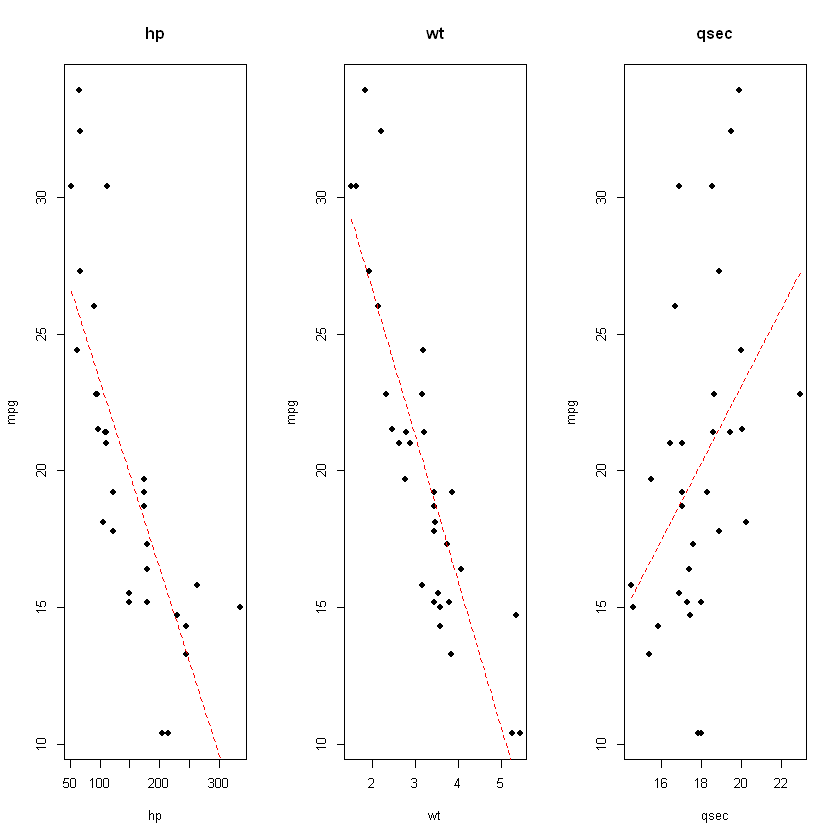

In [5]:
fit1<-lm(mpg ~ hp*wt*qsec, data=mtcars)
graphs_glm(fit1,1,3,pch=16)

En el gráfico scatter plot (hp vs mpg) de los datos indica que el consumo de combustible por kilómetro disminuye linealmente a medida que aumentan los caballos de fuerza (hp) en los vehiculos. Se evidencia entonces una correlación negativa asi como se evidencia  el scatter plot (wt vs mpg) el cual da indicios de que el consumo de combustible disminuye linealmente a medida que aumentaq el peso del automovil.

En lo que corresponde al scatter plot (qsec vs mpg) se logra observar que el consumo de combustible por kilómetro aumenta linealmente a medida que aumenta el tiempo en segundos que el automovil tarda en recorrer 1/4 de milla implicando una correlación positiva (directamente proporcional).


Ajustando el modelo por medio de la función **lm** se tiene:

In [6]:
fit <- lm(mpg ~ hp+wt+qsec, data=mtcars)
summary(fit)

fit1 <- lm(mpg ~ hp*wt*qsec, data=mtcars)
summary(fit1)


Call:
lm(formula = mpg ~ hp + wt + qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8591 -1.6418 -0.4636  1.1940  5.6092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.61053    8.41993   3.279  0.00278 ** 
hp          -0.01782    0.01498  -1.190  0.24418    
wt          -4.35880    0.75270  -5.791 3.22e-06 ***
qsec         0.51083    0.43922   1.163  0.25463    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.578 on 28 degrees of freedom
Multiple R-squared:  0.8348,	Adjusted R-squared:  0.8171 
F-statistic: 47.15 on 3 and 28 DF,  p-value: 4.506e-11



Call:
lm(formula = mpg ~ hp * wt * qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4250 -1.4475 -0.3224  1.4808  3.8751 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  3.390830  61.505159   0.055    0.956
hp           0.262481   0.486684   0.539    0.595
wt           0.798347  19.265774   0.041    0.967
qsec         2.541218   3.342305   0.760    0.454
hp:wt       -0.059683   0.142575  -0.419    0.679
hp:qsec     -0.021579   0.027228  -0.793    0.436
wt:qsec     -0.487965   1.050227  -0.465    0.646
hp:wt:qsec   0.004907   0.007969   0.616    0.544

Residual standard error: 2.185 on 24 degrees of freedom
Multiple R-squared:  0.8982,	Adjusted R-squared:  0.8685 
F-statistic: 30.25 on 7 and 24 DF,  p-value: 2.033e-10


## Contraste de hipótesis de interacción

Analizando el modelo mediante la función **lm:modelo lineal**, las interacciones no son significativas, se evalua considerando el siguiente sistema de hipótesis:

$$H_{0}: \beta_5=\beta_6=\beta_7=\beta_8 =0\;\;\;\;vs \;\;\;\; H_{1}: \beta_5 \neq  \beta_6  \neq  \beta_7  \neq  \beta_8  \neq 0$$


In [7]:
fit1 <- lm(mpg ~ hp+ wt+ qsec+ hp*wt+ hp*qsec+ wt*qsec+ hp*wt*qsec, data=mtcars)
anova_glm(fit1,fit)    #H_o  :  b_5=b_6=0   se concluye que no hay interaccion, las rectas son paralelas, las rectas
                        #tienen la misma pendianete.  
                        #comparando la SCres, OBSERVANDO LA SALIDA RESIDUAL STANDAR ERROR ES SQRT(SIGMA{2)


 F test 

 Model 1:  mpg ~ hp + wt + qsec + hp * wt + hp * qsec + wt * qsec + hp * wt * qsec 
 Model 2:  mpg ~ hp + wt + qsec 

    F    Df1 Df2  Pr(>F)  
  3.7397   4  24 0.01675 *


El resultado anterior generado por **anova_glm(fit1,fit)** está determinado al particionar $\mathbf{\beta}=(\beta_1 , \beta_2)$ donde **s=4** es la dimensión del vector $\beta_2$:

$$F=\frac{Q(\mathbf{\widehat{\beta}}^{(0)})-Q(\mathbf{\widehat{\beta}})}{s \widehat{\sigma}^2}\;\;\;\;\;\; ; \;\;\;\;\;\;\;F \sim F_{(1-\alpha)}(s,n-p)$$

$$F=\frac{(2.578^2)*28 - (2.185^2)*24}{(4 )(2.185^2)}= 3.7397$$

Aquí: 
* #4 es la dimension del vector de hipotesisi nula
* $Q(\mathbf{\widehat{\beta}}^{(0)})= (\widehat{\sigma}^2)* gl $ es: **scres  del modelo sin interacción**
* $Q(\mathbf{\widehat{\beta}})= (\widehat{\sigma}^2)* gl  $ es:  **scres del modelo con interacción (se sabe que sigma es mas pequeño)**

* pv=1-pf(3.7397, , )= 0.01675

Esta es la prueba de significancia de la regresión todo para determinar si existe relación lineal entre la respuesta y cualquiera de las variables regresoras. Los resultados indican que SI existe evidencia estadísticamente significativa para rechazar $H_0$, por lo que se puede concluir que almenos un $\beta_j \neq 0$ para algún $j\in(5,6,7,8)$. Por lo tanto, el modelo seleccionado para analizar los datos puede identificarse mediante: 


In [8]:
step_glm(fit1,direction="backward",criterion="BIC")             #forward


Initial model:
mpg ~ 1 + hp + wt + qsec + hp:wt + hp:qsec + wt:qsec + hp:wt:qsec 

Step 0 :    
             Df      BIC      AIC   R-squared*   PRESS+     CP**  p-value
- hp:wt:qsec  1   159.8676 148.1417     0.8718   6.4924   6.3792   0.5438
<none>            162.8317 149.6401     0.8685   7.0929   8.0000         

Step 1 :  - hp:wt:qsec 
          Df      BIC      AIC   R-squared*   PRESS+     CP**  p-value
- wt:qsec  1   156.4130 146.1528     0.8767   5.5295   4.3876   0.9266
- hp:qsec  1   157.5716 147.3114     0.8721   5.9284   5.2868   0.3439
<none>         159.8676 148.1417     0.8718   6.4924   6.3792         
- hp:wt    1   167.6471 157.3869     0.8248   8.9619  14.6446   0.0033

Step 2 :  - wt:qsec 
          Df      BIC      AIC   R-squared*   PRESS+     CP**  p-value
- hp:qsec  1   154.1791 145.3847     0.8766   5.2179   3.3448   0.3217
<none>         156.4130 146.1528     0.8767   5.5295   4.3876         
- hp:wt    1   166.9253 158.1309     0.8162   7.9165  15.7465   0.

El anterior codigo establece el procedimiento *backward* de selección de variables para de esta forma identificar el mejor modelo en terminos algunos criterios como AIC, BIC, CP-Mallows, p-valor: 

* **paso 0**: Si quito la interacción  triple tendría un BIC=159.8676 mucho menor que el bic de no hacer nada. luego es aconsejable quitar la interacción triple. Con el AIC me da la misma conclusión. Con el R^2 (Entre mayor + mejor ) tambien indica que es bueno quirtar la interaccion triple.  **CONCLUSIÓN: Sacar la interacción doble**.

* **paso 1**:   quitar  wt:qsec 
* **paso 2**:   quitar hp:qsec 
* **paso 3**:

Se puede notar que los nivles de significacia del p-valor en los pasos 1-4 son muy grandes, por tal motivo se opta porquitar dichas variables explicativas en el modelo hasta quedar valors significativos al $1\%, 5\% y 10\%$  Después de realizar el paso a paso se llega al siguiente modelo:

$$mpg \sim 1 + hp + wt + hp:wt $$


$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta = \beta_1 + \beta_2 x_{k2} + \beta_3 x_{k3} + \beta_4 x_{k2} x_{k3} \\
		 \epsilon_k \overset{\text{iid}}{\sim} Normal(0, \sigma^2)
	       \end{array}
	     \right.
   \end{equation*}
   $$

In [9]:
#################### Ajuste del modelo ####################
fit2 <- lm(mpg ~ hp*wt, data=mtcars)
gof_glm(fit2)
summary(fit2)

                           Value
Dispersion parameter      4.6343
Multiple R-squared        0.8848
Adjusted R-squared        0.8724
Allen's PRESS*            5.4852
-2*log-Likelihood       135.6109
AIC                     145.6109
BIC                     152.9395

* value divided by the sample size




Call:
lm(formula = mpg ~ hp * wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.0632 -1.6491 -0.7362  1.4211  4.5513 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 49.80842    3.60516  13.816 5.01e-14 ***
hp          -0.12010    0.02470  -4.863 4.04e-05 ***
wt          -8.21662    1.26971  -6.471 5.20e-07 ***
hp:wt        0.02785    0.00742   3.753 0.000811 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.153 on 28 degrees of freedom
Multiple R-squared:  0.8848,	Adjusted R-squared:  0.8724 
F-statistic: 71.66 on 3 and 28 DF,  p-value: 2.981e-13


In [10]:
X <- model.matrix(fit2)                               # Matriz del modelo
betas <- coef(fit2)                                   # Par?metros estimados
sigma2 <- sum(resid(fit2)^2)/fit2$df.residual         # Estimaci?n de sigma^2
MV<-vcov(fit2)                                        # Matriz de varianzas y covarianzas estimada
a<-sigma2*solve(t(X)%*%X)
b<-sqrt(diag(vcov(fit2)))                             # Errores est?ndar
c<-sqrt(diag(sigma2*solve(t(X)%*%X)))
d<-fitted(fit2)                                       # Estimaci?n de mu
e<-X%*%betas

## Interpretación de los parámetros

* Al nivel de significancia del $5\%$ existe evidencia estadísticamente significativa de que el efecto del peso del automovil sobre el consumo esperado de combustible depende del número de caballos de fuerza. (en otras palabras estadisticamente $\beta_4 \neq 0$)

En correspondencia al modelo generado por el **step_glm()** se procede a realizar la interpretación de los parámetros estimados:

**Interpretación del efecto de la biomasa ($\beta_2$)**

* Sin importar el peso del automovil, el consumo esperado de combustible disminuye aproximadamente, 0.12 galones por cada unidad que aumenta los caballos de fuerza.  (en otras palabras a medida que aumentan los caballos de fuerza, el consumo esperado de combustible disminuye en 0.12 aproximadamente por cada unidad adicional en caballos de fuerza) *otra interpretación es que al comparar dos carros con peso cero, se tiene que por cada caballo de fuerza adicional el consumo de combustible promedio disminuye en 0.12 mpg*

**Interpretación del efecto del ph ($\beta_3 , \beta_4$)**

* Si se comparan dos autos con los mismos caballos de fuerza pero donde uno de ellos tiene una unidad adicional en peso mayor que el otro, entonces el consumo de combustible esperado en el auto con mayor peso disminuye aproximadamente 8.21 mpg.


**Interpretación de $\sigma$**

* Distancia promedio entre la diferencia del consumo de combustible en un carro particular y el valor promedio de los mismos.

Por otro lado, el valor del coeficiente de determinación ($R^2 = 0.8848$) indica que $88.48 \%$ de las diferencias entre los 32 automoviles de la muestra con respecto al consumo de combustible se explica por las diferencias entre las mismas en relación al peso y a los caballos de fuerza.


---
## Análisis de sensibilidad


integer(0)

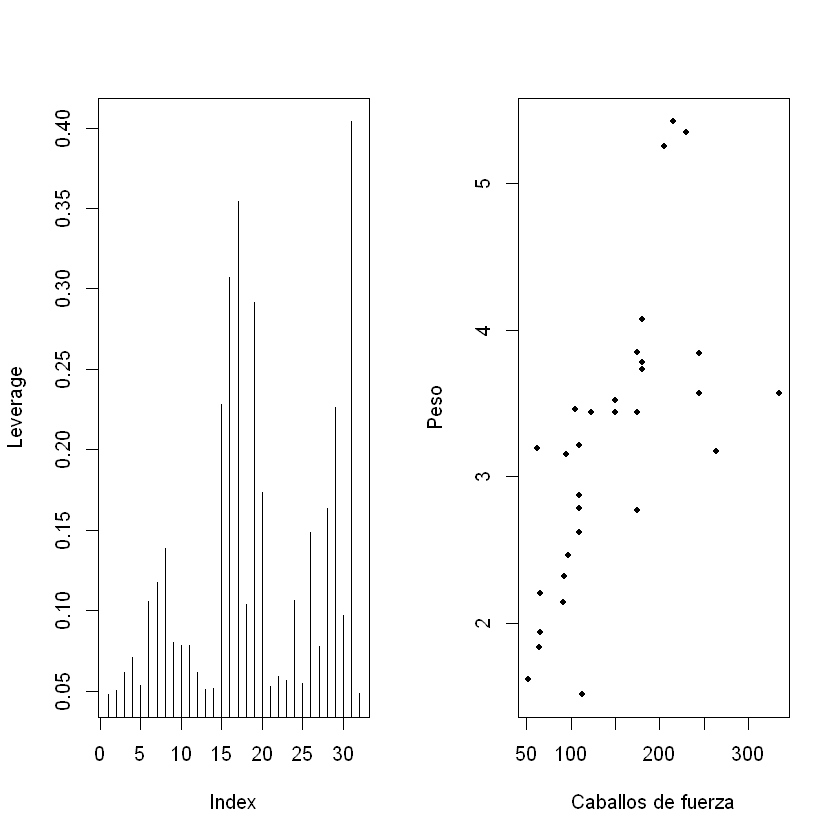

In [12]:
#################### Leverage #################### 
par(mfrow=c(1,2))
out <- leverage_glm(fit2,identify=5,out=TRUE)

with(mtcars,{plot(mtcars$hp,mtcars$wt,pch=20,xlab="Caballos de fuerza",ylab="Peso")
  identify(mtcars$hp,mtcars$wt,n=5)})


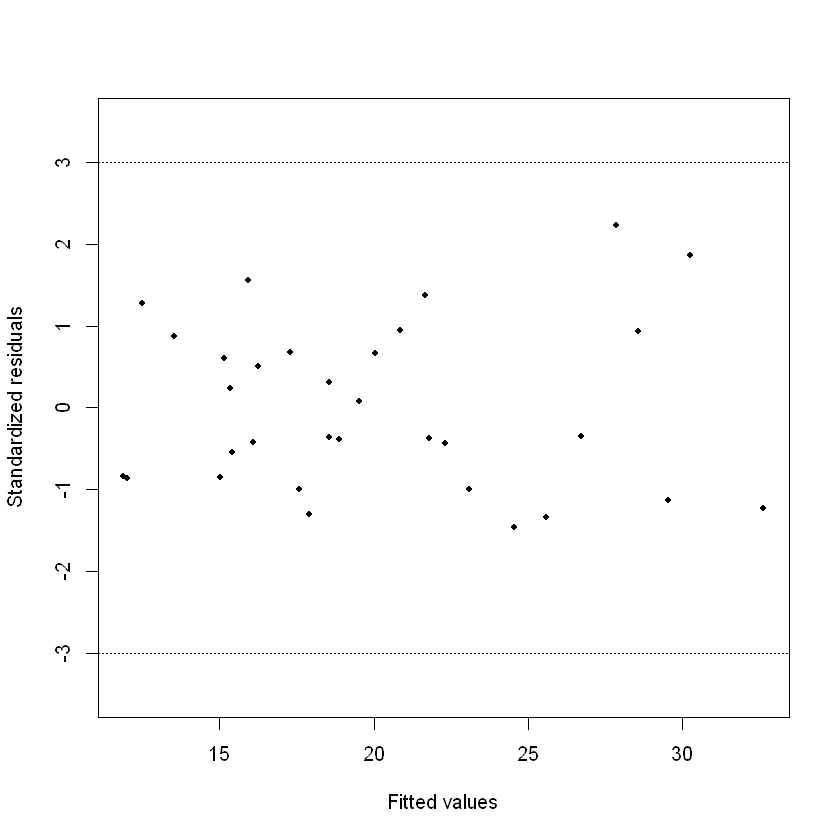

In [13]:
#################### Residuos estandarizados #################### 
residuals_glm(fit2,identify=3)


            Estimate  Std. Error   Pr(>|t|)  | Estimate* Std. Error*  Pr(>|t|)*
(Intercept) 49.808423    3.605156    0.00000 | 48.317387    3.748003    0.00000
hp          -0.120102    0.024698    0.00004 | -0.104246    0.027356    0.00073
wt          -8.216624    1.269708    0.00000 | -7.740378    1.308743    0.00000
hp:wt        0.027848    0.007420    0.00081 |  0.023043    0.008233    0.00935
            | Change(%)
(Intercept) |    -2.994
hp          |    13.202
wt          |     5.796
hp:wt       |   -17.255

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.

            Estimate  Std. Error   Pr(>|t|)  | Estimate* Std. Error*  Pr(>|t|)*
(Intercept) 49.808423    3.605156    0.00000 | 47.870452    3.423355    0.00000
hp          -0.120102    0.024698    0.00004 | -0.109439    0.023224    0.00007
wt          -8.216624    1.269708    0.00000 | -7.716642    1.190283    0.00000
hp:wt        0.027848    0.007420    0.00081 |  0.025141    0

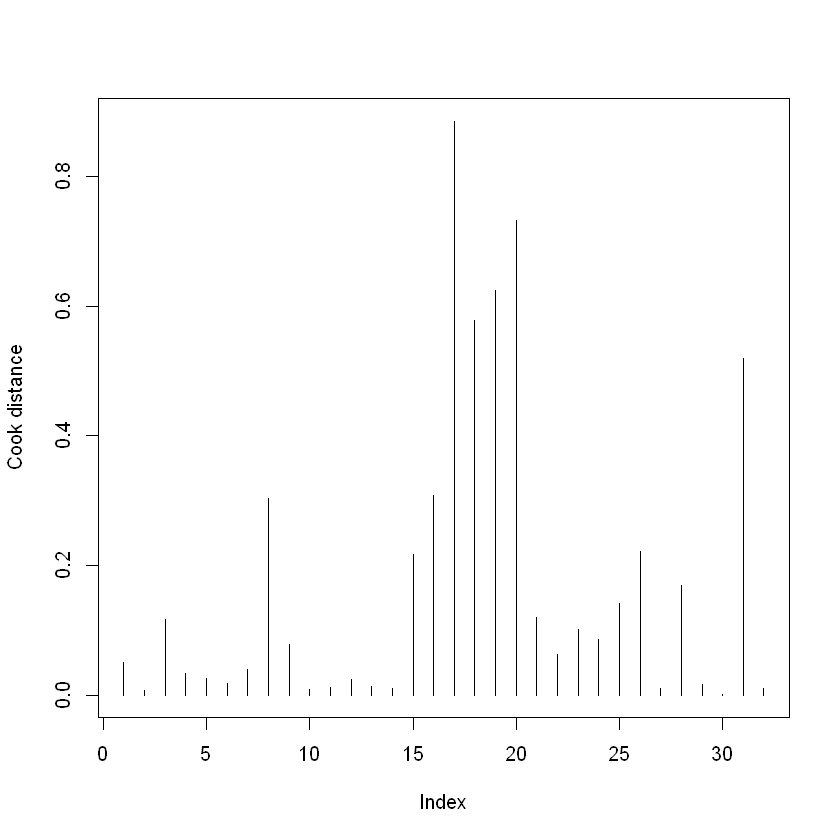

In [14]:
#################### Distancia de Cook #################### 
Cookdis_glm(fit2,identify=4)
case.deletion_glm(fit2,subset=-c(17))
case.deletion_glm(fit2,subset=-c(18))
case.deletion_glm(fit2,subset=-c(19))
case.deletion_glm(fit2,subset=-c(20))

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


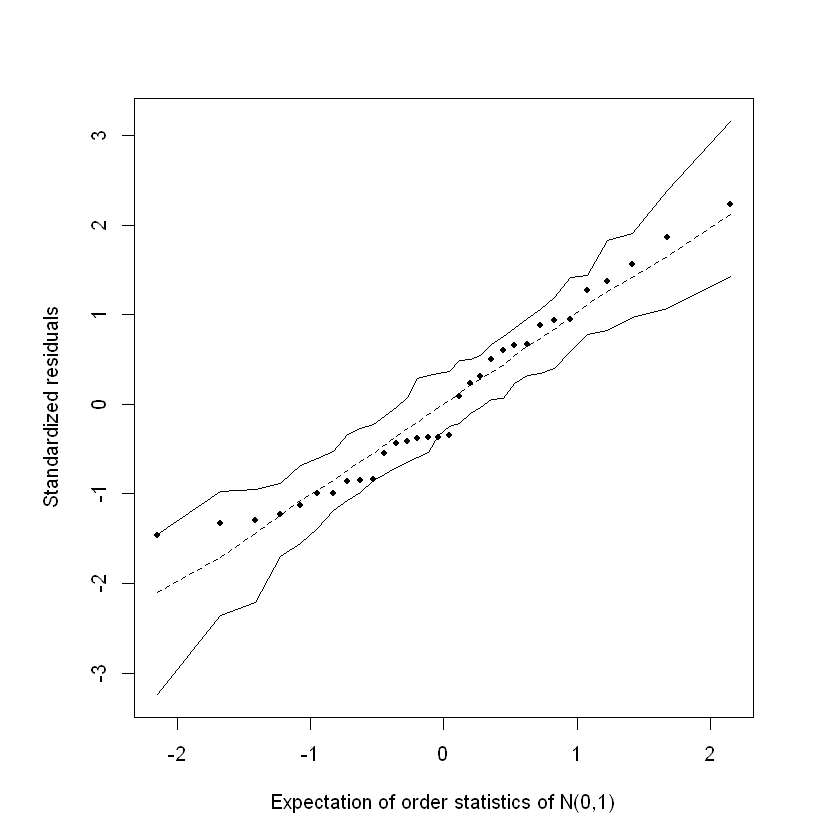

In [16]:
#################### Envelope simulado #################### 
envelope_glm(fit2,rep=100,conf=0.95)

---

## Test de varianza constante


La homocedasticidad, es una característica de un modelo de regresión lineal que implica que la varianza de los errores es constante a lo largo del tiempo. Supongase el *modelo normal lineal heterocedastico* descrito por:

$\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           Y_k = \mu_k + \epsilon_k\\
		 \mu_k=\mathbf{x}_k'\beta  \\
		 \epsilon_k \overset{\text{iid}}{\sim} Normal(0, \sigma_k^2)\\
         log(\sigma_k^2) =\vartheta_1 + Z_k \vartheta 
	       \end{array}
	     \right.
   \end{equation*}
   $$
  
  
 Tengase en cuenta $\Theta_{(p+q)}$ de dimensión (p+q) donde: $\Theta= \left ( \beta ^r , \vartheta _1, \vartheta ^T \right )^T$ con $\beta$ de dimensión p, $\vartheta _1$ de dimensión 1 y $\vartheta ^T$ de dimensión q-1.
 
La forma de proceder está en contrastar la siguiente hipótesis:

$$H_{0}: \vartheta =0\;\;\;\;\;\;\;\;vs \;\;\;\; \;\;\;\;H_{1}: \vartheta \neq  0$$
 
 
 <div class="alert alert-success">
  Si no rechazo $H_0$ entonces $H_0= \vartheta =0$ implica que  $log(\sigma_k^2) =\vartheta _1$ lo cual da indicios de que $log(\sigma_k^2)$ no depende de k lo cual acevera que existe varianza constante.
</div>

Dentro de todos los test existentes, en el modelo normal lineal los test de homogeneidad son iguales. *Sin embargo el test de Rao-Score es el mas barato de hacer*

---
#####  Test razon de verosimilutudes (para verificar homoceasticidad)

$$\zeta_{RV}=2[l( \widehat{\theta} )-l( \widehat{\theta}^{(0)} )]\;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{RV}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

*Verosimilitud del modelo completo* menos la *verosimilitud del modelo restringido*, aquí $\widehat{\theta}= {\underset{\theta \in \mathbb{R}^{p+q} }{argmax}}\;l(\theta)$

---
#####  Test razon de wald (necesita 1 parámetro a estimar $\widehat{\theta}$ )

$$\zeta_{w}=(\widehat{\vartheta} -0)^{T}[\widehat{Var}(\widehat{\vartheta})]^{-1}(\widehat{\vartheta} -0) \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{w}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

---
#####  Test de Score o Rao  (necesita 1 parámetro a estimar $\widehat{\theta}^{(0)}$ )

$$\zeta_{s}=\left \{   [U_{\vartheta}(\theta)]^{T}Var(\widehat{\vartheta})[U_{\vartheta}(\theta)]   \right \} |_{\theta=\widehat{\theta}^{(0)}}  \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{s}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

Aquí $U(\theta)= \bigtriangledown l(\theta)$ es el vector gradiente y $U_{\vartheta}(\theta)$ los últimos (q-1) valores del vector gradiente.

---
#####  Test gradiente  (necesita 2 maximizaciones $\widehat{\theta}$ y $\widehat{\theta}^{(0)}$)

$$\zeta_{G}= [U_{\vartheta}(\theta)]^{T}\; \widehat{\theta}^{(0)} (\widehat{\vartheta} -0)  \;\;\;\;\;\;\; ; \;\;\;\;\;\;\; \zeta_{s}\; \overset{H_0}{\underset{n \to \infty }{\sim}} \; \chi^2_{(q-1)} $$

---

In [100]:
#################### Test de varianza constante #################### 
vdtest(fit2)
bptest(fit2,studentize=FALSE)


             Score test for varying dispersion

          Statistic =  5.08072 
 degrees of freedom =  3 
            p-value =  0.16598 



ERROR: Error in bptest(fit2, studentize = FALSE): no se pudo encontrar la función "bptest"


El anterior test establece que: 

$$log(\sigma_k^2) =\vartheta_1 + \vartheta_2 (hp) + \vartheta_3 (wt) + \vartheta_4 (ℎ𝑝:𝑤𝑡) $$

Donde:

$$H_{0}: \vartheta_2 = \vartheta_3 = \vartheta_4 = 0\;\;\;\;\;\;\;\;vs \;\;\;\; \;\;\;\;H_{1}: \vartheta_2 \neq \vartheta_3 \neq \vartheta_4 \neq 0$$

Al $5\% $ se concluye que NO existe evidencia estadísticamente significativa para rechazar $H_0$ lo cual implica que que el modelo es homocedastico, es decir el supuesto de varianza constante se cumple.

In [101]:
#################### Intervalos de confianza para beta #################### 
ci_glm(fit2, conf=0.95)


 Exact 95 percent confidence intervals

            Lower limit Upper limit
(Intercept)    42.42360     57.1933
hp             -0.17069     -0.0695
wt            -10.81750     -5.6157
hp:wt           0.01265      0.0430


# Estimación de $\mu$ para individuos que no estan en la muestra

Se realizará la estimación de dos individuos que tienen las siguientes características: 

* (hp:145 y wt=3.2)
* (hp:88 y wt=3)

In [102]:
#################### Estimaci?n de mu para individuos que no est?n en la muestra #################### 
estimacion <- predict(fit2,data.frame(hp=145,wt=3.2)) ;estimaciones
estimaciones <- predict(fit2,data.frame(hp=88,wt=3)) ;estimaciones

1 
21.94148

1 
21.94148

## NOTA:   

Para instalar librerias de R en jupyter notebooks usamos la siguiente linea 

* install.packages("ISLR", "/home/user/anaconda3/lib/R/library")  no usar este comando
* install.packages("sm", "/Users/YULY/anaconda/Lib/R/library")

Para más información verificar el siguiente enlace::

https://www.pythond.com/23094/conda-como-instalar-paquetes-r-que-no-estan-disponibles-en-r-essentials.html

* También puede usarse el siguiente comando desde r para instalar el entorno de r 

install.packages("CASdatasets", "/Users/YULY/anaconda/Lib/R/library",repos = "http://cas.uqam.ca/pub/R/")


---
Algunas de las bases de datos están en el siguiente enlace: 

* http://users.stat.ufl.edu/~aa/glm/data/
* http://rpubs.com/angie_angie/465175